## Q47 形态学处理

-----

* [原理](http://blog.sina.com.cn/s/blog_159aff7940102xdf4.html)

* [https://blog.csdn.net/qq_36387683/article/details/80479793](https://blog.csdn.net/qq_36387683/article/details/80479793)

* [https://segmentfault.com/a/1190000015650320](https://segmentfault.com/a/1190000015650320)

* [其他形态学处理](https://blog.csdn.net/qq_40962368/article/details/81276820)

-----
### 膨胀(Dilate)  & 腐蚀(Erode)

将图像大津二值化之后进行腐蚀与膨胀操作
* 腐蚀
> 具体的操作方法是拿一个宽m,高n的矩形作为模板，对图像中的每一个像素x做如下处理：像素x至于模板的中心，根据模版的大小，遍历所有被模板覆盖的其他像素，修改像素x的值为所有像素中最小的值

* 膨胀
> 膨胀操作与腐蚀操作相反，是将图像的轮廓加以膨胀。操作方法与腐蚀操作类似，也是拿一个矩形模板，对图像的每个像素做遍历处理。不同之处在于修改像素的值不是所有像素中最小的值，而是最大的值。这样操作的结果会将图像外围的突出点连接并向外延伸

腐蚀--黑色增多，白色变少  
主要应用在去除白噪声，也可以断开连在一起的物体  
膨胀--白色增多，
主要应用于连接对象破碎部分


|op  |原图|pic |作用|
|:--:|:-:|:-:|:-:|
|腐蚀  |![origin](./pic/morphological_origin.png)|![erode](./pic/morphological_erode.png)| 黑色增多，去除白噪声，也可以断开连在一起的物体|
|膨胀  |![origin](./pic/morphological_origin.png)|![dilate](./pic/morphological_dilate.png)| 白色增多，连接对象破碎部分|
|开操作|![origin](./pic/morphological_open.png)|![open](./pic/morphological_open2.png)| 先腐蚀再膨胀，消除小白点,消除物体表面的突起|
|闭操作|![origin](./pic/morphological_close.png)|![close](./pic/morphological_close2.png)|先膨胀再腐蚀，消除对象中的小黑洞|

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1


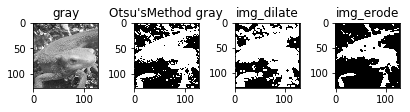

In [2]:
img = cv2.imread("gg.jpg")
(H, W, C) = img.shape
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(141)
plt.imshow(img_gray, cmap='gray')
plt.title("gray")
plt.subplot(142)
plt.imshow(img_thresh, cmap='gray')
plt.title("Otsu'sMethod gray")


# kernel = np.ones((3, 3), dtype=np.uint8)
kernel_size = 3
a = kernel_size // 2
print(a)
img_padding = np.zeros((H+2*a,W+2*a), dtype=np.uint8)
img_dilate = img_padding.copy()
img_erode = img_padding.copy()
img_padding[1:H+1,1:W+1] = img_thresh
for h in range(H):
    for w in range(W):
        img_dilate[h + a, w + a] = img_padding[h:h+2*a+1, w:w+2*a+1].max()
        img_erode[h + a, w + a] = img_padding[h:h+2*a+1, w:w+2*a+1].min()
plt.subplot(143)
plt.imshow(img_dilate, cmap='gray')
plt.title("img_dilate")
plt.subplot(144)
plt.imshow(img_erode, cmap='gray')
plt.title("img_erode")
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, 
                    hspace=0.25, wspace=0.55)
plt.show()

### 开闭运算

-------

* 开运算  

先腐蚀，再膨胀

* 顶帽(top hat)
顶帽运算是原图像与开运算的结果图的差  
求大津二值化之后的图像和开处理（N=3）之后的图像的差

> 作用：
> * 可以提取出细线状的部分或者噪声
> * 背景提取

* 闭运算  

先膨胀，再腐蚀

* 黑帽(Black Hat)

黑帽运算是原图像与闭运算的结果图的差  
求大津二值化之后的图像和闭处理（N=3）之后的图像的差，在这里和顶帽运算一样，可以提取出细线状的部分或者噪声

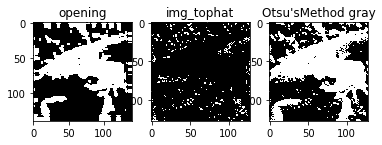

In [13]:
# 开运算
img = cv2.imread("gg.jpg")
(H, W, C) = img.shape
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


kernel_size = 3
a = kernel_size // 2
img_padding = img_thresh.copy()

time = 3

for i in range(time):
    tem = np.pad(img_padding, (a,a),'edge')
    erode = tem.copy()
#     print(tem.shape)
#     print(tem)
    for h in range(a, H+a):
        for w in range(a, W+a):
            erode[h,w] = tem[h-a : h+a+1, w-a : w+a+1].min()
    img_padding = erode
#     print(img_padding)
            
    tem = np.pad(img_padding, (a,a),'edge')
    dilate = tem.copy()
#     print(tem)
#     print(tem.shape)
    for h in range(a, H+a):
        for w in range(a, W+a):
            dilate[h,w] = tem[h-a : h+a+1, w-a : w+a+1].max()
    img_padding = dilate 
#     print(img_padding)

img_tophat = img_thresh - img_padding[2*time*a : H+2*time*a, 2*time*a : W+2*time*a]

plt.figure()    
plt.subplot(131)
plt.imshow(img_padding, cmap='gray')
plt.title("opening")
plt.subplot(132)
plt.imshow(img_tophat, cmap='gray')
plt.title("img_tophat")
plt.subplot(133)
plt.imshow(img_thresh, cmap='gray')
plt.title("Otsu'sMethod gray")
plt.show()

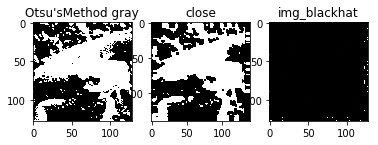

In [16]:
# 闭运算

img = cv2.imread("gg.jpg")
(H, W, C) = img.shape
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


kernel_size = 3
a = kernel_size // 2
img_padding = img_thresh.copy()

time = 3

for i in range(time):
    # 膨胀
    tem = np.pad(img_padding, (a,a),'edge')
    dilate = tem.copy()
#     print(tem.shape)
#     print(tem)
    for h in range(a, H+a):
        for w in range(a, W+a):
            dilate[h,w] = tem[h-a : h+a+1, w-a : w+a+1].max()
    img_padding = dilate
#     print(img_padding)
    
    # 腐蚀
    tem = np.pad(img_padding, (a,a),'edge')
    erode = tem.copy()
#     print(tem)
#     print(tem.shape)
    for h in range(2*a, H+2*a):
        for w in range(2*a, W+2*a):
            erode[h,w] = tem[h-a : h+a+1, w-a : w+a+1].min()
    img_padding = erode 
#     print(img_padding)

img_blackhat = img_thresh - img_padding[2*time*a : H+2*time*a, 2*time*a : W+2*time*a]

plt.figure()
plt.subplot(131)
plt.imshow(img_thresh, cmap='gray')
plt.title("Otsu'sMethod gray")
plt.subplot(132)
plt.imshow(img_padding, cmap='gray')
plt.title("close")
plt.subplot(133)
plt.imshow(img_blackhat, cmap='gray')
plt.title("img_blackhat")
plt.show()

### 形态学梯度(Morphology Gradient)

* [https://blog.csdn.net/dieju8330/article/details/83901693](https://blog.csdn.net/dieju8330/article/details/83901693)

----

形态学梯度为经过膨胀操作（dilate）的图像与经过腐蚀操作（erode）的图像的差，

可以用于抽出物体的边缘。
> 作用：
>* 突出高亮区域的外围
>* 为轮廓查找提供新思路


内部梯度：是用原图像减去腐蚀之后的图像得到差值图像，称为图像的内部梯度

外部梯度：图像膨胀之后再减去原来的图像得到的差值图像，称为图像的外部梯度

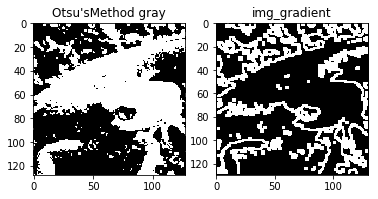

In [10]:
img = cv2.imread("gg.jpg")
(H, W, C) = img.shape
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 核大小(矩形核)
kernel_size = 3
a = kernel_size // 2

# 腐蚀与膨胀
img_padding = np.pad(img_thresh, (a, a), 'edge')
img_erode = img_padding.copy()
img_dilate = img_padding.copy()

for h in range(a, a+H):
    for w in range(a, a+W):
        img_erode[h, w]  = img_padding[h-a : h+a+a, w-a : w+a+1].min()
        img_dilate[h, w] = img_padding[h-a : h+a+1, w-a : w+a+1].max()
img_gradient = img_dilate - img_erode

plt.figure()    
plt.subplot(121)
plt.imshow(img_thresh, cmap='gray')
plt.title("Otsu'sMethod gray")
plt.subplot(122)
plt.imshow(img_gradient, cmap='gray')
plt.title("img_gradient")
plt.show()



### opencv 实现

------

* [https://blog.csdn.net/zhangjunp3/article/details/79831117](https://blog.csdn.net/zhangjunp3/article/details/79831117)

------


*　核构造：

```python
retval=cv2.getStructuringElement(shape, ksize[, anchor])
```
retval：得到的核，矩阵形式  

shape：核的形状，有cv2.MORPH_RECT、cv2.MORPH_CROSS和cv2.MORPH_ELLIPSE  
 
ksize：核的大小， (x,y) 形式  

anchor：锚点，默认为中心  

```python
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # 矩形结构
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))  # 椭圆结构
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))  # 十字形结构
kernel = np.ones((5,5),np.uint8)
```

* 腐蚀与膨胀

```
dilation = cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])
dst = cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

```
> 第一个参数：src指需要操作的图，通道数任意，深度需为CV_8U，CV_16U，CV_16S，CV_32F或 CV_64F
> 第二个参数：kernel指腐蚀操作的内核，默认是一个简单的3X3矩阵，我们也可以利用getStructuringElement（）函数指明它的形状
> anchor：锚点位置，默认值为中心点
> iterations：iterations指的是腐蚀次数，省略是默认为1
> borderType和borderValue都有各自的默认值，通常不用理会

* 开闭运算、形态学梯度、顶帽、黑帽

```
dst=cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

```
> src：源图，深度需为CV_8U, CV_16U,CV_16S, CV_32F 或CV_64F
> op：操作标识符，即进行哪种操作
```
————MORPH_OPEN – 开运算（Opening operation）
————MORPH_CLOSE – 闭运算（Closing operation）
————MORPH_GRADIENT -形态学梯度（Morphological gradient）
————MORPH_TOPHAT - “顶帽”（“Top hat”）
————MORPH_BLACKHAT - “黑帽”（“Black hat“）
————MORPH_ERODE - “腐蚀”
————MORPH_DILATE - “膨胀”

```
![open_close_op.png](./pic/open_close.png)

```
closed　= cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
dst = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)
dst = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
```





#### c++ 

```cpp
Mat getStructuringElement(int shape, Size ksize, Point anchor = Point(-1, -1))
```

> int shape：内核形状
MORPH_RECT : 矩形
MORPH_ELLIPSE : 椭圆
MORPH_CROSS : 十字形
Size ksize：内核尺寸
Point anchor：内核锚点，默认为（ - 1， - 1）, 表示锚点位于内核中心，一般情况下锚点只是影响了形态学运算结果的偏移


```cpp
C++ : void dilate(
    InputArray src,
    OutputArray dst,
    InputArray kernel,
    Point anchor = Point(-1, -1),
    int iterations = 1,
    int borderType = BORDER_CONSTANT,
    const Scalar& borderValue = morphologyDefaultBorderValue()
);

```

```cpp
C++: void erode(
    InputArray src,
    OutputArray dst,
    InputArray kernel,
    Point anchor = Point(-1, -1),
    int iterations = 1,
    int borderType = BORDER_CONSTANT,
    const Scalar& borderValue = morphologyDefaultBorderValue()
);
```
> InputArray src：输入图像，即源图像，填Mat类的对象即可。图像通道的数量可以是任意的，但图像深度应为CV_8U，CV_16U，CV_16S，CV_32F或 CV_64F其中之一
> int iterations = 1：迭代使用erode（）函数的次数，默认值为1
> int borderType = BORDER_CONSTANT：用于推断图像外部像素的某种边界模式。注意它有默认值BORDER_DEFAULT